In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp


In [3]:
# simple pendulum ODE: d²θ/dt² = -(g/L)*sin(θ);
# so initial values for mass of obj, length l and angle at which displaced
g= 9.81 #m/s
L=1.0 #mass = 1 kg assuming
theta = 0.2 #radians
omega = 0.0 # initial speed angular

In [5]:
y= [theta, omega]
# simulation (from 0 to 10 seconds)
t_start = 0.0
t_end = 10.0

In [6]:
t_eval = np.linspace(t_start, t_end, 300)

def pendulum_equations(t, y):
    theta, omega = y
    dtheta_dt = omega
    domega_dt = -(g / L) * np.sin(theta)
    return [dtheta_dt, domega_dt]


In [7]:
solution = solve_ivp(
    pendulum_equations,
    (t_start, t_end),
    y,                        # initial conditions
    t_eval=t_eval,             # times at which to store the solution
    method='RK45',             # Runge-Kutta method of order 5(4)
    rtol=1e-6, atol=1e-9        # tolerances for accuracy
)

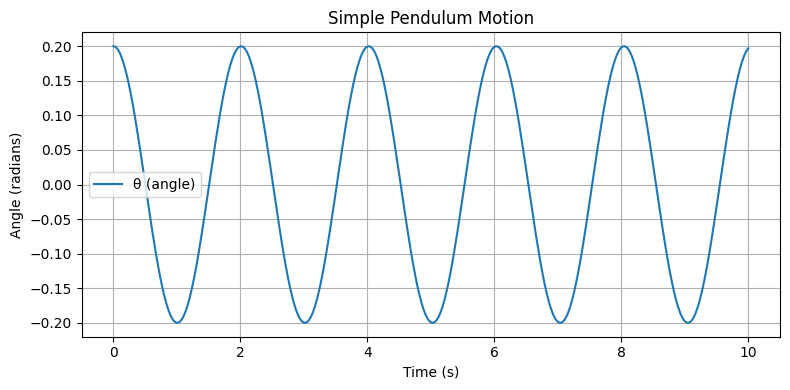

In [8]:
# since no other resistance present
plt.figure(figsize=(8, 4))
plt.plot(solution.t, solution.y[0], label='θ (angle)')
plt.xlabel('Time (s)')
plt.ylabel('Angle (radians)')
plt.title('Simple Pendulum Motion')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()